In [1]:
%matplotlib inline
from utils.paths import *

import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
print pruebas
print datasets
print dataframe_columns

['baseline', 'msda', 'gfk', 'pca', 'sda']
['amazon', 'twitter']
['Adaptacion', 'Tarea', 'Fuente', 'Objetivo', 'Baseline error', 'Transfer error', 'Transfer loss']


In [3]:
def get_scores_dataframe(dataset):
    df = None

    for prueba in pruebas:
        path = os.path.join(scores_path, prueba, dataset+'.csv')
                
        if os.path.exists(path):
            print path
            if df is None:
                df = pd.read_csv(path, sep=',', header=0)
            else:
                new_df = pd.read_csv(path, sep=',', header=0)
                df = df.append(new_df, ignore_index=True)
    
    if df is None:
        return pd.DataFrame(columns=dataframe_columns)
                
    #se dejan disponibles solamente la tarea, el tipo de adaptacion y el error
    df_a = df[['Adaptacion', 'Tarea', 'Transfer loss']]
    
    # se manipula el dataframe para 
    df_a = df_a.groupby(['Tarea', 'Adaptacion'], as_index=True ).max()
    df_a = df_a.unstack(level=1)
    df_a.columns = df_a.columns.levels[1]
    
    return df_a

# Gráficos del dataset Amazon

In [4]:
df_amazon = get_scores_dataframe(datasets[0])
df_amazon

scores/baseline/amazon.csv
scores/msda/amazon.csv
scores/gfk/amazon.csv
scores/sda/amazon.csv


Adaptacion,Baseline,GFK,SDA,mSDA
Tarea,,,,
b->d,3.00,12.25,6.00,13.75
b->e,6.75,14.50,22.50,19.25
b->k,10.00,18.50,20.00,15.50
d->b,11.50,13.00,12.25,19.00
d->e,11.75,12.25,10.00,17.75
d->k,7.75,14.75,15.00,13.50
e->b,13.25,17.75,16.25,26.00
e->d,9.00,11.50,13.25,23.00
e->k,2.00,9.25,8.50,9.25


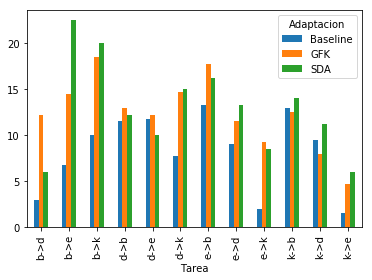

In [5]:
df_amazon.plot.bar()

# Gráficos del dataset Twitter

In [4]:
df_twitter = get_scores_dataframe(datasets[1])
df_twitter

scores/baseline/twitter.csv
scores/msda/twitter.csv
scores/gfk/twitter.csv
scores/sda/twitter.csv


Adaptacion,Baseline,GFK,SDA,mSDA
Tarea,,,,
r->t,5.384615,11.538462,19.230769,31.538462
t->r,2.083333,13.541667,20.833333,23.958333


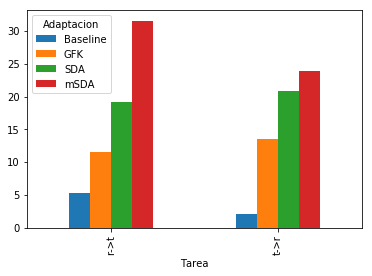

In [5]:
df_twitter.plot.bar()